## About the dataset

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:

1) Basic Service 
2) E-Service 
3) Plus Service 
4) Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing

df = pd.read_csv("teleCust1000t.csv")
df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


In [5]:
# Counting the users of each service
df["custcat"].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [6]:
# To use sklearn library, we have to convert the df to a Numpy array
X = df[["region", "tenure", "age", "marital", "address", "income", "ed", "employ", "retire", "gender", "reside"]].values
y = df[["custcat"]].values

For algorithms such as KNN which is based on distance of cases, we need to standardize the data.

Standardization gives the data zero mean and unit variance

In [9]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [10]:
# 80-20 Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [11]:
# Let the KNN start with k = 4
from sklearn.neighbors import KNeighborsClassifier

k = 4
clf = KNeighborsClassifier(n_neighbors = k)
clf = clf.fit(X_train, y_train)
Y_hat = clf.predict(X_test)

# In multilabel classification, metrics.accuracy_score returns the jaccard score
from sklearn import metrics

print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, Y_hat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


C:\Users\Ümit\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [13]:
# Now let's try different K values: 1 to 10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
scores = []

for k in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf = clf.fit(X_train, y_train)
    Y_hat = clf.predict(X_test)
    train_acc = metrics.accuracy_score(y_train, clf.predict(X_train))
    test_acc = metrics.accuracy_score(y_test, Y_hat)
    scores.append(test_acc)


C:\Users\Ümit\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Ümit\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Ümit\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Ümit\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Ümit\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A colu

In [14]:
scores

[0.3, 0.29, 0.315, 0.32, 0.315, 0.31, 0.335, 0.325, 0.34, 0.33]

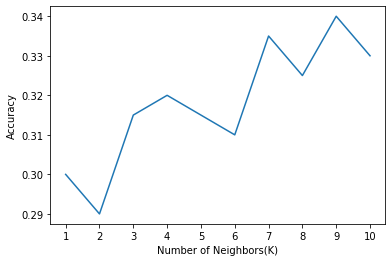

In [24]:
# Max score is K = 9
# Now let's plot

plt.plot(range(1,11), scores)
plt.xticks(range(1,11))
plt.xlabel("Number of Neighbors(K)")
plt.ylabel("Accuracy")
plt.show()